# Descrição do projeto


Há a proposto do time de Designers de alteração da fonte usada no aplicativo, mas os gerentes temem que os usuários achem o novo design intimidador. Então, será análisado se através de testes estatísticos se essa mudança será positiva ou não.

Os usuários são divididos em três grupos: dois grupos de controle recebem as fontes antigas e um grupo de teste recebe as novas. Descubra qual conjunto de fontes produz melhores resultados.

## O que será analisado no projeto.


> Passo 1. Preparo dos dados para análise:


* Renomear as colunas de uma maneira que seja conveniente para você
* Verificar se há valores ausentes e tipos de dados. Corrija os dados, se necessário
* Adicionar uma coluna de data e hora e uma coluna separada para datas

> Passo 2. Estudo e verificação dos dados:


* Quantos eventos ficam nos diários?
* Quantos usuários ficam nos diários?
* Qual é o número médio de eventos por usuário?
* Qual é o período de tempo que os dados cobrem? Encontrar a data máxima e mínima. Desenhar um histograma por data e hora. Encontrar o momento em que os dados começam a ser completos e ignorar a seção anterior.
* Houve perda eventos e usuários ao excluir os dados mais antigos?
* Certificar-se de ter usuários de todos os três grupos experimentais.


> Passo 3. Estudar o funil de eventos:


* Ver quais eventos estão nos diários e sua frequência de ocorrência.
* Encontrar o número de usuários que executaram cada uma dessas ações. Ordenar os eventos pelo número de usuários. Calcular a proporção de usuários que executaram a ação pelo menos uma vez.
* Usar o funil de eventos para encontrar a parcela de usuários que passam de uma etapa para a próxima. (Por exemplo, para a sequência de eventos A → B → C, calcular a proporção de usuários na etapa B para o número de usuários na etapa A e a proporção de usuários na etapa C para o número na etapa B.)
* Em qual fase há mais perda de usuários?
* Qual é a parcela de usuários que faz o caminho inteiro, desde o primeiro evento até o pagamento?


> Passo 4. Estudar os resultados do experimento:


* Quantos usuários há em cada grupo?
* Temos dois grupos de controle no teste A/A, no qual verificamos nossos mecanismos e cálculos. Ver se há uma diferença estatisticamente significativa entre as amostragens 246 e 247.
* Selecionar o evento mais popular. Em cada um dos grupos de controle, encontrar o número de usuários que realizaram essa ação. Encontrar a proporção deles. Verificar se a diferença entre os grupos é estatisticamente significativa. Repitir o procedimento para todos os outros eventos. Confirmar se os grupos foram divididos corretamente?
* Fazer a mesma coisa para o grupo com fontes alteradas. Comparar os resultados com os de cada um dos grupos de controle para cada evento isoladamente. Comparar os resultados com os resultados combinados para os grupos de controle.
* Qual nível de significância definido para testar as hipóteses estatísticas mencionadas acima? Calcular quantos testes de hipóteses estatísticas foram realizados.

# Importando Bibliotecas

In [2]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# Importando Dataset

In [3]:
try: 
    df = pd.read_csv(r'logs_exp_us.csv', sep='\t')
except:
    df = pd.read_csv(r'/datasets/logs_exp_us.csv')

# Funções Usadas

In [4]:
def mannwhitneyu_tstats(event,group1,group2):
    sample1 = event_pivot[event_pivot['group']==group1][event]
    sample2 = event_pivot[event_pivot['group']==group2][event]
    
    results = stats.mannwhitneyu(sample1,sample2)
    alpha = 0.05
    
    print('Diferença Estatística de', event, 'entre os Grupos:', group1 , 'e', group2)
    print('p-value: ', results.pvalue.round(3))
    if (results.pvalue < alpha):
        print("Hipótese nula rejeitada: Há diferença estatística significante entre as amostras.")
    else:
        print("Falha ao rejeitar a Hipótese Nula. Não há diferença estatística entre as amostras")   



def significance_testing(event):
    mannwhitneyu_tstats(event,'A1','A2')
    print()
    print('='*100)
    print()
    mannwhitneyu_tstats(event,'A1','B')
    print()
    print('='*100)
    print()
    mannwhitneyu_tstats(event,'A2','B')
    
       

# Descrição dos Dados


Cada entrada de diário é uma ação do usuário ou um evento.

* EventName — nome do evento
* DeviceIDHash — dentificador de usuário exclusivo
* EventTimestamp — hora do evento
* ExpId — número do experimento: 246 e 247 são os grupos de controle, 248 é o grupo de teste

In [5]:
print('='*90)
display(df.head())
print()
print('='*90)
print(df.info())
print()
print('='*90)
print(f'A quantidade de dados ausentes é de: {df.isna().sum()}')
print('='*90)
print(f'A quantidade de dados duplicados é de: {df.duplicated().sum()}')
print(f'Que corresponde a {round(df.duplicated().sum()/df.shape[0], 4)}%')


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

A quantidade de dados ausentes é de: EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64
A quantidade de dados duplicados é de: 413
Que corresponde a 0.0017%


In [6]:
df[df.duplicated()]

,EventName,DeviceIDHash,EventTimestamp,ExpId
453,MainScreenAppear,5613408041324010552,1564474784,248
2350,CartScreenAppear,1694940645335807244,1564609899,248
3573,MainScreenAppear,434103746454591587,1564628377,248
4076,MainScreenAppear,3761373764179762633,1564631266,247
4803,MainScreenAppear,2835328739789306622,1564634641,248
...,...,...,...,...
242329,MainScreenAppear,8870358373313968633,1565206004,247
242332,PaymentScreenSuccessful,4718002964983105693,1565206005,247
242360,PaymentScreenSuccessful,2382591782303281935,1565206049,246
242362,CartScreenAppear,2382591782303281935,1565206049,246


In [7]:
df = df.drop_duplicates()

Os dados parecem limpos, a não ser o fato de haver 413 dados duplicados, que podem ter N interpretações. Eles foram retirados pois já foi feita a análise dos dados e eles realmente devem ser retirados pois podem ter sido fruto de uma atualização de página por parte do usuário, ou algo parecido, que gerou essa repetição de entradas.

In [8]:
df.columns = ['event', 'id', 'time', 'group']
df['time'] = pd.to_datetime(df['time'], unit='s')
df['date'] = df['time'].dt.floor('1D')
df['group'] = df['group'].replace({246: 'A1', 247: 'A2', 248: 'B'})

In [9]:
print('='*92)
display(df.head())
print()
print('='*92)
print(df.info())
print()
print('='*92)
print(f'A quantidade de dados ausentes é de: {df.isna().sum()}')
print('='*92)
print(f'A quantidade de dados duplicados é de: {df.duplicated().sum()}')
print(f'Que corresponde a {round(df.duplicated().sum()/df.shape[0], 4)}%')

,event,id,time,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,A1,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,A1,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,B,2019-07-25



<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   event   243713 non-null  object        
 1   id      243713 non-null  int64         
 2   time    243713 non-null  datetime64[ns]
 3   group   243713 non-null  object        
 4   date    243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 11.2+ MB
None

A quantidade de dados ausentes é de: event    0
id       0
time     0
group    0
date     0
dtype: int64
A quantidade de dados duplicados é de: 0
Que corresponde a 0.0%


Dados tratados, os nomes das colunas foram alterados para facilitar a análise e deixando os nomes das colunas mais intuitivos.

Os códigos de grupos de cibtrike 246 e 247 foram alterados para A1 e A2, respectivamente, e o grupo de teste 248 foi alterado para B, de moto também a falcilitar e ser mais intuitivo.

# Análise dos Dados

In [10]:
# Análise de eventos e eventos por usuários.
print('='*35)
print('O número de eventos ocorridos são:')
print('='*35)
display(df.event.value_counts())
print('='*35)
print(f'Total de eventos: {df.id.count()}')
print('='*35)
print(f'Total de usuários: {df.id.nunique()}')
print('='*35)
print(f'Média de eventos por usuários: {round(df.id.count()/df.id.nunique())}')

O número de eventos ocorridos são:


MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event, dtype: int64

Total de eventos: 243713
Total de usuários: 7551
Média de eventos por usuários: 32


Em média cada usuário participa de 32 eventos dentro da página, desde a págian inicial até o pagamento. 

In [11]:
# Período de tempo que os dados cobrem

print(f'Data Mínima: {df.time.min()}')
print(f'Data Máxima: {df.time.max()}')

Data Mínima: 2019-07-25 04:43:36
Data Máxima: 2019-08-07 21:15:17


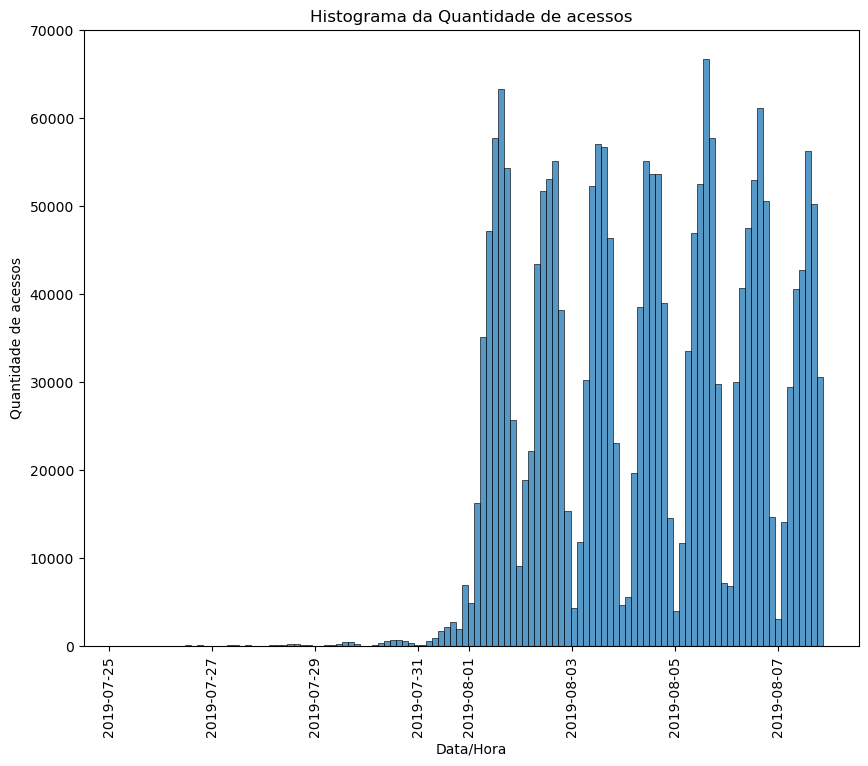

In [30]:
plt.figure(figsize=(10,8))
sns.histplot(df, x='time', stat='frequency')
plt.title('Histograma da Quantidade de acessos')
plt.ylabel('Quantidade de acessos')
plt.xlabel('Data/Hora')
plt.xticks(rotation = 90)
plt.show();

O gráfico apresenta padrões inconsistentes e passa a seguir padrões mais consistentes a partir do dia 1 de agosto.

In [32]:
temp_pivot = df.pivot_table(index='date', values='id', aggfunc='count')

data = go.Scatter(
    x=temp_pivot.index,
    y=temp_pivot['id'],
    mode='lines+markers',
    marker=dict(color='#063b52'),
    line=dict(width=2))

layout = go.Layout(
    title='Atividade dos Usuários',
    xaxis=dict(title='Data'),
    yaxis=dict(title='Quantidade de Usuários'),
    margin=dict(l=100, r=100, t=50, b=50))
fig = go.Figure(data=[data], layout=layout)


fig.show()

Como se pode observar o gráfico de linha segue o mesmo padrão e apresenta o mesmo problema que o Histograma. 

In [14]:
pivot_df = df.pivot_table(index=['date', 'group'], values='id', columns='event', aggfunc='count')
pivot_df

event             CartScreenAppear  MainScreenAppear  OffersScreenAppear  \
date       group                                                           
2019-07-25 A1                  NaN               3.0                 1.0   
           A2                  NaN               1.0                 NaN   
           B                   2.0               NaN                 NaN   
2019-07-26 A1                  4.0               5.0                 3.0   
           A2                  1.0               4.0                 1.0   
           B                   1.0               7.0                 NaN   
2019-07-27 A1                  2.0              17.0                 3.0   
           A2                  2.0              15.0                 5.0   
           B                   NaN               7.0                 1.0   
2019-07-28 A1                  7.0              19.0                 4.0   
           A2                  6.0              16.0                 9.0   
           B                  11.0              18.0                 3.0   
2019-07-29 A1                  5.0              46.0                 2.0   
           A2                 10.0              38.0                 7.0   
           B                   8.0              48.0                11.0   
2019-07-30 A1                 12.0              99.0                 9.0   
           A2                 16.0              86.0                23.0   
           B                  21.0              94.0                19.0   
2019-07-31 A1                 78.0             384.0               115.0   
           A2                 79.0             427.0               117.0   
           B                 100.0             439.0               142.0   
2019-08-01 A1               2287.0            5370.0              2062.0   
           A2               2009.0            6256.0              2376.0   
           B                1921.0            6319.0              2550.0   
2019-08-02 A1               1764.0            5620.0              2241.0   
           A2               1915.0            5292.0              2208.0   
           B                2843.0            5880.0              2475.0   
2019-08-03 A1               2082.0            4671.0              2088.0   
           A2               2107.0            4942.0              2194.0   
           B                2185.0            5219.0              2513.0   
2019-08-04 A1               2238.0            5178.0              2191.0   
           A2               1603.0            4958.0              2095.0   
           B                2314.0            5067.0              2201.0   
2019-08-05 A1               2327.0            6010.0              2120.0   
           A2               1448.0            6062.0              2230.0   
           B                2473.0            5933.0              2316.0   
2019-08-06 A1               2068.0            5795.0              2090.0   
           A2               1768.0            6389.0              2103.0   
           B                1897.0            6577.0              2340.0   
2019-08-07 A1               1924.0            5032.0              1975.0   
           A2               1584.0            5191.0              1973.0   
           B                1546.0            5567.0              1992.0   

event             PaymentScreenSuccessful  Tutorial  
date       group                                     
2019-07-25 A1                         NaN       NaN  
           A2                         NaN       NaN  
           B                          2.0       NaN  
2019-07-26 A1                         2.0       NaN  
           A2                         NaN       2.0  
           B                          1.0       NaN  
2019-07-27 A1                         1.0       1.0  
           A2                         NaN       1.0  
           B                          NaN       NaN  
2019-07-28 A1                         3.0       NaN  
       

Como podemos ver, até a data dia 31/07/2019 temos dados incompletos. Logo isso poderá influenciar na nossa análise. Por isso esses dados serão filtrados para as datas com dados completos, que é a partir de 01/08/2019.
A partir desse ponto o novo Data set será analisado assim como feito com o acima.

In [15]:
#Filtragem
df2 = df.query('time >= "2019-08-01 00:00"')

In [42]:
# Análise de eventos e eventos por usuários. - Filtrado

print('='*35)
print('O número de eventos ocorridos são:')
print('='*35)
display(df2.event.value_counts())
print('='*35)
print(f'Total de eventos: {df2.id.count()}')
print('='*35)
print(f'Total de usuários: {df2.id.nunique()}')
print('='*35)
print(f'Média de eventos por usuários: {round(df2.id.count()/df2.id.nunique())}')
print()
print('='*35)
print(f'Foram filtrados {round(df2.id.count()/df.id.count(), 2)}% dos dados.')
print('='*35)
display(df2.event.value_counts()/df.event.value_counts())
print('='*35)


O número de eventos ocorridos são:


MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64

Total de eventos: 240887
Total de usuários: 7534
Média de eventos por usuários: 32

Foram filtrados 0.99% dos dados.


MainScreenAppear           0.985113
OffersScreenAppear         0.989852
CartScreenAppear           0.991446
PaymentScreenSuccessful    0.994138
Tutorial                   0.987230
Name: event, dtype: float64

Em média cada usuário continua participando de 32 eventos dentro da página, desde a página inicial até o pagamento. Os dados retirados não comprometem a análise pois representam apenas 0,99% dos dados. 

In [17]:
# Período de tempo que os dados cobrem

print(f'Data Mínima: {df2.time.min()}')
print(f'Data Máxima: {df2.time.max()}')

Data Mínima: 2019-08-01 00:07:28
Data Máxima: 2019-08-07 21:15:17


Os gráficos com os dados filtrados, estão abaixo. 

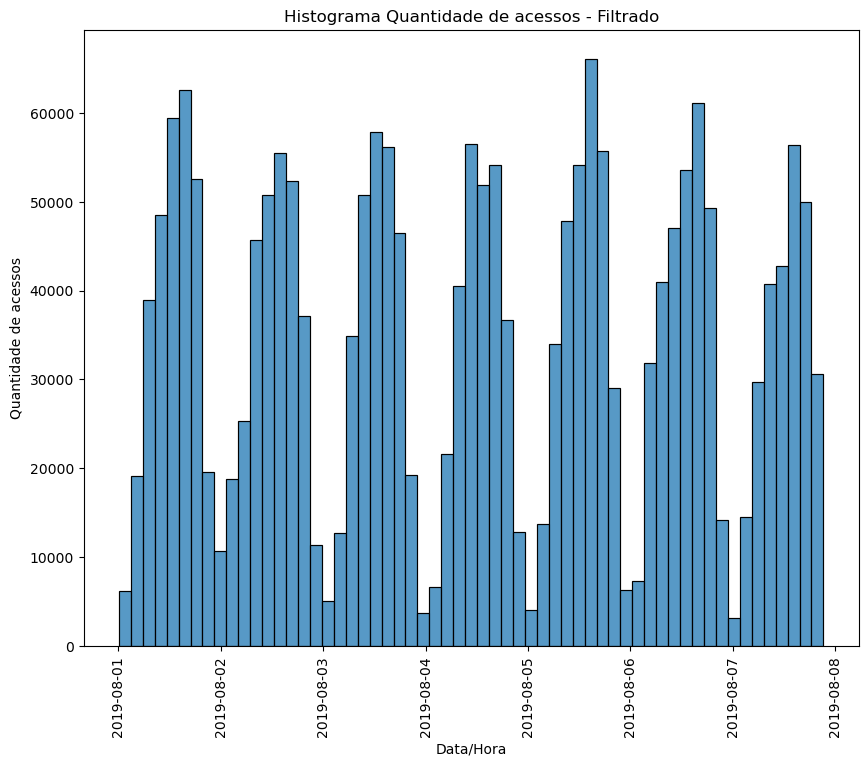

In [28]:
plt.figure(figsize=(10,8))
sns.histplot(df2, x='time', stat='frequency')
plt.title('Histograma Quantidade de acessos - Filtrado')
plt.ylabel('Quantidade de acessos')
plt.xlabel('Data/Hora')
plt.xticks(rotation = 90)
plt.show();

In [29]:
temp_pivot = df2.pivot_table(index='date', values='id', aggfunc='count')

data = go.Scatter(
    x=temp_pivot.index,
    y=temp_pivot['id'],
    mode='lines+markers',
    marker=dict(color='#063b52'),
    line=dict(width=2))

layout = go.Layout(
    title='Atividade dos usuários',
    xaxis=dict(title='Data'),
    yaxis=dict(title='Quantidade de Usuários'),
    margin=dict(l=100, r=100, t=50, b=50))
fig = go.Figure(data=[data], layout=layout)


fig.show()

Observa-se que há uma pequena diferença no gráfico de linha, enquanto no histograma o gráfico fora apenas fatiado. A ausência do pico do dia 1 de Agosto foi devido a inconsistência dos dados anteriores a esta data.

In [18]:
#Criação da Pivot Table


event_pivot = (pd.pivot_table(df2,
                              values='id',
                              index=['date', 'group'], 
                              columns='event', 
                              aggfunc='count').reset_index().rename_axis('', axis=1)
              )
event_pivot['Conversion'] = event_pivot['PaymentScreenSuccessful'] / event_pivot['MainScreenAppear']
cumsum_event = event_pivot.groupby('group').cumsum()
cumulative_event = pd.concat([event_pivot[['date', 'group']], cumsum_event], axis=1)

cumulative_event

,date,group,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial,Conversion
0,2019-08-01,A1,2287,5370,2062,1785,57,0.332402
1,2019-08-01,A2,2009,6256,2376,1585,80,0.253357
2,2019-08-01,B,1921,6319,2550,1401,83,0.221712
3,2019-08-02,A1,4051,10990,4303,3040,123,0.555712
4,2019-08-02,A2,3924,11548,4584,3116,124,0.542661
5,2019-08-02,B,4764,12199,5025,3763,141,0.623413
6,2019-08-03,A1,6133,15661,6391,4725,172,0.916448
7,2019-08-03,A2,6031,16490,6778,4841,180,0.891710
8,2019-08-03,B,6949,17418,7538,5472,198,0.950870
9,2019-08-04,A1,8371,20839,8582,6590,214,1.276626


In [19]:
frequency = df2.pivot_table(index='event',values='id',aggfunc='count').sort_values('id')

frequency_filtered = frequency[frequency.index != 'Tutorial'].sort_values('id', ascending=False)


data = go.Funnel(
    y=frequency_filtered.index,
    x=frequency_filtered['id'],
    textposition='inside',
    textinfo='value+percent previous'
    
)

layout = go.Layout(
    title='Funil de Eventos ocorridos'
    
)


fig = go.Figure(data=data, layout=layout)


fig.show()

In [20]:
users_per_event = (df2.pivot_table(index='event',values='id',aggfunc='nunique').sort_values('id'))

users_per_event_filtered = users_per_event[users_per_event.index != 'Tutorial'].sort_values('id', ascending = False)


data = go.Funnel(
    y=users_per_event_filtered.index,
    x=users_per_event_filtered['id'],
    textposition='inside',
    textinfo='value+percent previous'
)

layout = go.Layout(
    title='Funil de usuários'
)


fig = go.Figure(data=data, layout=layout)


fig.show()



A respeito dos Funis, vemos que no primeiro cerca de 80% dos eventos que foram concluidos passaram pela tela do carrinho, entretanto, esse número representa apenas 28,9% dos evento que passou pela página inicial. 
Mas quando olhamos para o Funil de usurários, os números melhoram os usuários que chegaram na tela de carrinho 94,8% finalizaram a compra, e 47,7% passaram pela tela inicial. 

O que pode nos mostrar que no primeiro caso apresentado o usuário estava apenas pesquisando. O que não chega a refletir a real intenção.

# Teste A/B

Agora serão testados se há diferença estatísticas entre os Grupos de Controle e também com o Grupo de Teste.

O nível de significância escolhido foi de 95%, logo, o alpha será de 5%. Esse nível de significância foi escolhido pelo fato de que um número de significância melhor, como por exemplo 90%, exporia os testes a uma propabilidade maior de errar, portanto, protegemos assim a qualidade da análise proposta.

## Evento: MainScreenAppear

In [21]:
significance_testing('MainScreenAppear')

Diferença Estatística de MainScreenAppear entre os Grupos: A1 e A2
p-value:  0.62
Falha ao rejeitar a Hipótese Nula. Não há diferença estatística entre as amostras


Diferença Estatística de MainScreenAppear entre os Grupos: A1 e B
p-value:  0.209
Falha ao rejeitar a Hipótese Nula. Não há diferença estatística entre as amostras


Diferença Estatística de MainScreenAppear entre os Grupos: A2 e B
p-value:  0.535
Falha ao rejeitar a Hipótese Nula. Não há diferença estatística entre as amostras


## Evento: OffersScreenAppear

In [22]:
significance_testing('OffersScreenAppear')

Diferença Estatística de OffersScreenAppear entre os Grupos: A1 e A2
p-value:  0.318
Falha ao rejeitar a Hipótese Nula. Não há diferença estatística entre as amostras


Diferença Estatística de OffersScreenAppear entre os Grupos: A1 e B
p-value:  0.026
Hipótese nula rejeitada: Há diferença estatística significante entre as amostras.


Diferença Estatística de OffersScreenAppear entre os Grupos: A2 e B
p-value:  0.097
Falha ao rejeitar a Hipótese Nula. Não há diferença estatística entre as amostras


## Evento: CartScreenAppear

In [23]:
significance_testing('CartScreenAppear')

Diferença Estatística de CartScreenAppear entre os Grupos: A1 e A2
p-value:  0.038
Hipótese nula rejeitada: Há diferença estatística significante entre as amostras.


Diferença Estatística de CartScreenAppear entre os Grupos: A1 e B
p-value:  0.902
Falha ao rejeitar a Hipótese Nula. Não há diferença estatística entre as amostras


Diferença Estatística de CartScreenAppear entre os Grupos: A2 e B
p-value:  0.097
Falha ao rejeitar a Hipótese Nula. Não há diferença estatística entre as amostras


## Evento: PaymentScreenSuccessful


In [24]:
significance_testing('PaymentScreenSuccessful')

Diferença Estatística de PaymentScreenSuccessful entre os Grupos: A1 e A2
p-value:  0.026
Hipótese nula rejeitada: Há diferença estatística significante entre as amostras.


Diferença Estatística de PaymentScreenSuccessful entre os Grupos: A1 e B
p-value:  0.902
Falha ao rejeitar a Hipótese Nula. Não há diferença estatística entre as amostras


Diferença Estatística de PaymentScreenSuccessful entre os Grupos: A2 e B
p-value:  0.165
Falha ao rejeitar a Hipótese Nula. Não há diferença estatística entre as amostras


## Evento: Conversion

In [25]:
significance_testing('Conversion')

Diferença Estatística de Conversion entre os Grupos: A1 e A2
p-value:  0.053
Falha ao rejeitar a Hipótese Nula. Não há diferença estatística entre as amostras


Diferença Estatística de Conversion entre os Grupos: A1 e B
p-value:  1.0
Falha ao rejeitar a Hipótese Nula. Não há diferença estatística entre as amostras


Diferença Estatística de Conversion entre os Grupos: A2 e B
p-value:  0.456
Falha ao rejeitar a Hipótese Nula. Não há diferença estatística entre as amostras


# Conclusão


Como se observou no decorrer da construção da análise houveram algumas inconsistências tratadas nos dados que não comprometeram o andamento do projeto. Permitindo assim fazer uma análise limpa dos dados que nos foram apresentados. 

Uma vez apresentados os dados limpos, podemos constatar que:

* Nas análises de funis percebe-se que apenas 28,9% do evento de MainScreen terminam na compra efetuada, o que pode representar em números absolutos o famoso "scrollar", apenas olhando e pesquisando para tomar uma decisão.
* A Rota mais comum é MainScreenAppear -> OffersScreenAppear -> CartScreenAppear -> PaymentScreenSuccessful, pois é a rota lógica.
* A maior perda é entre o primeiro evento e o segundo. Foi notada uma perda que quase 38%.


A respeito dos testes estatísticos:

* Fora usado o teste de Mann Whitney.
* Por convenção foi utilizado o α de 5%, ou seja, um nível de confiança de 95%
* Portanto, para o nosso caso de 12 testes estatísticos com um nível de confiança de 95% (ou α = 0,05), podemos calcular a probabilidade de nenhum erro ocorrer:

> * Probabilidade de nenhum erro = (1 - 0,05) ^ 12
> * Probabilidade de nenhum erro = 0,95 ^ 12
> * Probabilidade de nenhum erro ≈ 0,528

>> Isso significa que há uma probabilidade aproximada de 52,8% de que nenhum erro ocorra nos 12 testes estatísticos.

Posto isso os testse nos revelaram que:


* Há Diferença Estatística de OffersScreenAppear entre os Grupos: A1 e B;

* Há Diferença Estatística de CartScreenAppear entre os Grupos: A1 e A2;

* Há Diferença Estatística de PaymentScreenSuccessful entre os Grupos: A1 e A2.

* Enquanto nos outros eventos não há diferença estatística significante. 

Posto isso, o teste estatísticos nos trazem a percepção que não houve o impacto esperado a mudança da fonte do aplicativo. 






